## Regression Modeling Using The Sci-Kit Learn

In [3]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

## Import Data

In [4]:
#data
rawData = pd.read_csv('creditone_default.csv', header=0)
rawData.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
Unnamed: 0    30000 non-null int64
LIMIT_BAL     30000 non-null int64
SEX           30000 non-null int64
EDUCATION     30000 non-null int64
MARRIAGE      30000 non-null int64
AGE           30000 non-null int64
PAY_0         30000 non-null int64
PAY_2         30000 non-null int64
PAY_3         30000 non-null int64
PAY_4         30000 non-null int64
PAY_5         30000 non-null int64
PAY_6         30000 non-null int64
BILL_AMT1     30000 non-null int64
BILL_AMT2     30000 non-null int64
BILL_AMT3     30000 non-null int64
BILL_AMT4     30000 non-null int64
BILL_AMT5     30000 non-null int64
BILL_AMT6     30000 non-null int64
PAY_AMT1      30000 non-null int64
PAY_AMT2      30000 non-null int64
PAY_AMT3      30000 non-null int64
PAY_AMT4      30000 non-null int64
PAY_AMT5      30000 non-null int64
PAY_AMT6      30000 non-null int64
DEFAULT       30000 non-null int64
dtypes: int64(25

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

In [7]:
#features (X)
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [8]:
#dependent variable (y)
#rawData['DEFAULT'].unique()
depVar = rawData['DEFAULT']
rawData['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [9]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64


In [95]:
#Training Set (Feature Space: X Training)
X_train = features[: 1000]
X_train_count = len(X_train.index)
print('The number of observations in the Y training set are:',str(X_train_count))
X_train.head()

The number of observations in the Y training set are: 1000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [92]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [93]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
X_test.head()

The number of observations in the feature testing set is: 100


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
29900,20000,1,2,2,29,0,0,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29901,50000,1,2,2,29,1,2,0,0,0,...,103486,50590,50248,49387,0,6556,3250,1563,1208,781
29902,170000,1,3,2,30,0,-1,0,0,0,...,168955,161351,126198,124746,168096,6409,7335,4448,4519,5003
29903,260000,1,1,1,30,-1,0,-1,-1,-1,...,13333,99,99,172104,10018,13333,99,99,172104,30013
29904,60000,1,3,2,30,0,0,0,0,0,...,54126,58732,59306,59728,2600,4553,5800,2000,1000,1462


In [96]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: DEFAULT, dtype: int64

In [14]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [115]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 23), (750,), (250, 23), (250,))

In [67]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

## Random Forest Regression Model Fitting and Scoring

In [97]:
from sklearn.model_selection import cross_val_score
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))

print('These values correspond to the the following: ')
print('1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model')
print('2nd value:  The time for fitting the estimator on the train set for each cv split.')
print('3rd Value:  The time for scoring the estimator on the test set for each cv split.')
print('R-Squared:  %.3f' % modelRF.score(X_train,y_train))

C:\Users\Chaimaa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[-0.00340928 -0.01277184  0.05320019]
These values correspond to the the following: 
1st value:  The score array for test scores on each cv split. (Higher is an indicator of a better performing model
2nd value:  The time for fitting the estimator on the train set for each cv split.
3rd Value:  The time for scoring the estimator on the test set for each cv split.
R-Squared:  0.814


## Support Vector Regression Model Fitting and Scoring

In [98]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
print('R-Squared:  %.3f' % modelSVR.score(X_train,y_train))

C:\Users\Chaimaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chaimaa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Chaimaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Chaimaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change fro

[-0.00656497 -0.06214712 -0.02937855]
R-Squared:  0.940


## Linear Regression Model Fitting and Scoring

In [99]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
print('R-Squared:  %.3f' % modelLR.score(X_train,y_train))

[ 0.06300234 -0.01205847  0.08271477]
R-Squared:  0.109


C:\Users\Chaimaa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


## Make Predictions

In [101]:
#RandomForest Regression Model Predictions

predRF = modelRF.predict(X_test)
predRF_Rsquared = r2_score(y_test,predRF)
rmseRF = sqrt(mean_squared_error(y_test, predRF))
print('RandomForest Regression Model Predictions:')
print('RMSE: %.3f' % rmseRF)

#Support Vector Regression Model Predictions

predSVR = modelSVR.predict(X_test)
predSVR_Rsquared = r2_score(y_test,predSVR)
rmseSVR = sqrt(mean_squared_error(y_test, predSVR))
print('Support Vector Regression Model Predictions:')
print('RMSE: %.3f' % rmseSVR)

#Linear Regression Model Predictions

predLR = modelLR.predict(X_test)
predLR_Rsquared = r2_score(y_test,predLR)
rmseLR = sqrt(mean_squared_error(y_test, predLR))
print('Linear Regression Model Predictions:')
print('RMSE: %.3f' % rmseLR)

RandomForest Regression Model Predictions:
RMSE: 0.430
Support Vector Regression Model Predictions:
RMSE: 0.437
Linear Regression Model Predictions:
RMSE: 0.417


In [108]:
predRF

array([0.1, 0.4, 0.1, 0.2, 0.1, 0.3, 0.2, 0.3, 0.2, 0.3, 0.4, 0.2, 0.1,
       0.1, 0. , 0.6, 0. , 0.2, 0. , 0. , 0.5, 0.3, 0.3, 0.2, 0. , 0. ,
       0.3, 0. , 0.2, 0.1, 0.7, 0.4, 0.8, 0.5, 0.1, 0.1, 0.2, 0. , 0.8,
       0.1, 0.4, 0.1, 0. , 0. , 0.4, 0.3, 0. , 0.1, 0.2, 0. , 0.2, 0. ,
       0. , 0.2, 0.2, 0.3, 0.1, 0.4, 0.2, 0. , 0.3, 0. , 0.8, 0.3, 0. ,
       0. , 0.6, 0.1, 0.1, 0. , 0.1, 0.1, 0. , 0.6, 0.4, 0. , 0.3, 0. ,
       0.2, 0. , 0.3, 0.4, 0. , 0.1, 0.2, 0.3, 0.4, 0.1, 0.3, 0. , 0.2,
       1. , 0.5, 0. , 0.8, 0. , 0.1, 0.2, 0.5, 0.1])

In [109]:
predSVR

array([0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.64083217,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.27022989, 0.27022989,
       0.27022989, 0.27022989, 0.27022989, 0.24910021, 0.27022

In [110]:
predLR

array([ 0.13456225,  0.29070546, -0.09514945, -0.01464212,  0.19492163,
        0.34382244, -0.20851858,  0.37718622,  0.03935632,  0.08089669,
        0.06001236,  0.12723287,  0.17319345,  0.04956709,  0.26675751,
        0.41041261,  0.26689228,  0.13019854,  0.2017586 ,  0.24390563,
        0.475582  ,  0.31109185,  0.34124746,  0.17855842,  0.25100578,
        0.11478046,  0.53872339,  0.2161915 ,  0.30705319,  0.14633464,
        0.46951093,  0.26023452,  0.3919545 ,  0.09708568,  0.19974281,
        0.13398051,  0.20424405,  0.06540919,  0.44938412,  0.27675861,
        0.32010137,  0.3383527 ,  0.17391681,  0.23249616,  0.52043484,
        0.26316763,  0.09039135,  0.28075218,  0.0650424 ,  0.26877751,
        0.11186984,  0.19181664,  0.1692368 ,  0.17790834,  0.36482688,
        0.16665355,  0.28236893, -0.32567958,  0.23461963, -0.07773043,
        0.22503812,  0.06496391,  0.4319344 , -0.91599154,  0.20246049,
        0.20113727,  0.42404152,  0.2357045 ,  0.27110043,  0.19

## Plotting the Results

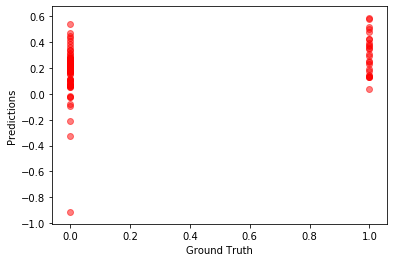

In [113]:
#Linear Regression Selected Model with best performance
#RMSE: 0.417
#R-Squared:  0.109
plt.scatter(y_test, predLR, c='r', alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();